# ChatGPT를 활용하여 7월 원수 탁도를 시각화



### 과제 선정 이유
##### 1. 현재 스마트정수장 약품공정 알고리즘은 평상시 저탁도 원수 유입시에 최적화되어 있어 홍수기에 댐 방류시 고탁수 원수 유입에 대처할 수 없음
##### 2. 작년도 탁수 유입때 약품을 많이 넣어도 침전수탁도가 1NTU 아래로 유지되지 않고 꾸준히 올라가는 상황 발생

### 과제 목표

##### 1. 현재 정수장에 들어오는 원수 탁도의 범위를 군집화 기법을 사용하여 시각화하여 저탁도 유입시, 고탁도 유입시 두 가지 경우에 대해 별도의 알고리즘을 갖출 필요성 파악

##### 2. 기존 정수장 운영 데이터가 100% 정답이 아님을 인정하고 가상의 물리환경을 통해 적정 약품 주입률 계산

##### ChatGPT가 보여준 각 군집화 알고리즘별 plt

![alt text](image.png)

![alt text](image-1.png)

##### K-Means 2 Clusters로 분석하기로 결정

##### import

In [12]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import openpyxl


plt.rcParams['font.family'] = 'Malgun Gothic'  # 맑은 고딕



그룹 1 평균:
원수 탁도               5.910590
3단계 1계열 응집제 주입률    15.128307
3단계 침전지 탁도          0.409185
dtype: float64

그룹 2 평균:
원수 탁도              176.385319
3단계 1계열 응집제 주입률     57.272960
3단계 침전지 탁도           0.646769
dtype: float64


AttributeError: Rectangle.set() got an unexpected keyword argument 'scale'

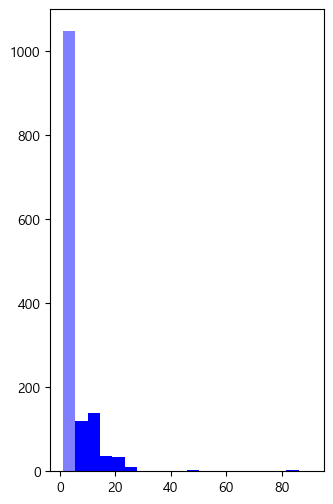

In [ ]:

# 데이터 불러오기
data = pd.read_excel('./data/SN_JULY.xlsx')

# 원수 탁도 데이터 추출
turbidity_data = data['원수 탁도'].values.reshape(-1, 1)

# K-Means 군집화 (2개 군집)
kmeans = KMeans(n_clusters=2, random_state=42)
data['Cluster'] = kmeans.fit_predict(turbidity_data)

# 각 그룹에 대해 원수 탁도, 약품 주입률, 침전 탁도의 평균값 계산
group_1 = data[data['Cluster'] == 0]
group_2 = data[data['Cluster'] == 1]

# 그룹 1과 그룹 2의 평균값
group_1_means = group_1[['원수 탁도', '3단계 1계열 응집제 주입률', '3단계 침전지 탁도']].mean()
group_2_means = group_2[['원수 탁도', '3단계 1계열 응집제 주입률', '3단계 침전지 탁도']].mean()

# 결과 출력
print("그룹 1 평균:")
print(group_1_means)
print("\n그룹 2 평균:")
print(group_2_means)

# 분포 분석 (히스토그램)
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(group_1['원수 탁도'], alpha=0.5, label='그룹 1', color='blue', bins=20)
plt.hist(group_2['원수 탁도'], alpha=0.5, label='그룹 2', color='red', bins=20)
plt.title('원수 탁도 분포')
plt.xlabel('원수 탁도')
plt.ylabel('빈도')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(group_1['3단계 1계열 응집제 주입률'], alpha=0.5, label='그룹 1', color='blue', bins=20)
plt.hist(group_2['3단계 1계열 응집제 주입률'], alpha=0.5, label='그룹 2', color='red', bins=20)
plt.title('약품 주입률 분포')
plt.xlabel('약품 주입률')
plt.ylabel('빈도')
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(group_1['3단계 침전지 탁도'], alpha=0.5, label='그룹 1', color='blue', bins=20)
plt.hist(group_2['3단계 침전지 탁도'], alpha=0.5, label='그룹 2', color='red', bins=20)
plt.title('침전 탁도 분포')
plt.xlabel('침전 탁도')
plt.ylabel('빈도')
plt.legend()

plt.tight_layout()
plt.show()

# 상관 분석
correlation_group_1 = group_1[['원수 탁도', '3단계 1계열 응집제 주입률', '3단계 침전지 탁도']].corr()
correlation_group_2 = group_2[['원수 탁도', '3단계 1계열 응집제 주입률', '3단계 침전지 탁도']].corr()

print("\n그룹 1 상관 분석:")
print(correlation_group_1)
print("\n그룹 2 상관 분석:")
print(correlation_group_2)